In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv("F:\Academics\MSC\Semester 3\Machine Learning 2\enrolldata.csv")

In [4]:
data.head()

,age,income,jobsatisfaction,desire,enrolls
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [5]:
features=data.columns.to_list()
features

['age', 'income', 'jobsatisfaction', 'desire', 'enrolls']

In [6]:
features.remove("enrolls")
features

['age', 'income', 'jobsatisfaction', 'desire']

In [7]:
ord_encoder=OrdinalEncoder()
data_encoded=ord_encoder.fit_transform(data[features])
data_encoded

array([[1., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [2., 2., 0., 1.],
       [2., 1., 1., 1.],
       [2., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 2., 0., 1.],
       [1., 1., 1., 1.],
       [2., 2., 1., 1.],
       [1., 2., 1., 0.],
       [0., 2., 0., 0.],
       [0., 0., 1., 1.],
       [2., 2., 0., 0.],
       [1., 2., 1., 1.],
       [0., 1., 0., 0.]])

In [8]:
new_data=pd.DataFrame(data_encoded,columns=features)
new_data

,age,income,jobsatisfaction,desire
0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,2.0,2.0,0.0,1.0
4,2.0,1.0,1.0,1.0
5,2.0,1.0,1.0,0.0
6,0.0,1.0,1.0,0.0
7,1.0,2.0,0.0,1.0
8,1.0,1.0,1.0,1.0
9,2.0,2.0,1.0,1.0


In [9]:
data['desire'].nunique()

2

In [11]:
encoder=LabelEncoder()
target_encoded=encoder.fit_transform(data['enrolls'])

new_data['enrolls']=target_encoded

In [12]:
new_data

,age,income,jobsatisfaction,desire,enrolls
0,1.0,0.0,0.0,1.0,0
1,1.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,1.0,1
3,2.0,2.0,0.0,1.0,1
4,2.0,1.0,1.0,1.0,1
5,2.0,1.0,1.0,0.0,0
6,0.0,1.0,1.0,0.0,1
7,1.0,2.0,0.0,1.0,0
8,1.0,1.0,1.0,1.0,1
9,2.0,2.0,1.0,1.0,1


In [13]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(new_data.values,i) 
            for i in range(len(features))]

In [14]:
vif['features']=features
vif

,vif,features
0,4.438540,age
1,4.775350,income
2,2.469693,jobsatisfaction
3,2.516855,desire


In [15]:
x=new_data.drop('enrolls',axis=1)
y=new_data['enrolls']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [42]:
cnb=CategoricalNB()
cnb.fit(x_train,y_train)

CategoricalNB()

In [43]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [44]:
pred_cnb=cnb.predict(x_test)
pred_gnb=gnb.predict(x_test)

In [45]:
pred_cnb_probability=cnb.predict_proba(x_test)
pred_gnb_probability=gnb.predict_proba(x_test)

In [46]:
count_misclass_cnb=(y_test != pred_cnb).sum()
accuracycnb=accuracy_score(pred_cnb,y_test)
print("misclassification= ",count_misclass_cnb)
print("accuracy",accuracycnb)

misclassification=  3
accuracy 0.4


In [47]:
count_misclass_gnb=(y_test != pred_gnb).sum()
accuracygnb=accuracy_score(pred_gnb,y_test)
print("misclassification= ",count_misclass_gnb)
print("accuracy",accuracygnb)

misclassification=  4
accuracy 0.2


In [48]:
print(classification_report(y_test,pred_cnb))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.42      0.44      0.30         5
weighted avg       0.65      0.40      0.38         5



C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [49]:
print(classification_report(y_test,pred_gnb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.20      1.00      0.33         1
           2       0.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.07      0.33      0.11         5
weighted avg       0.04      0.20      0.07         5



C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

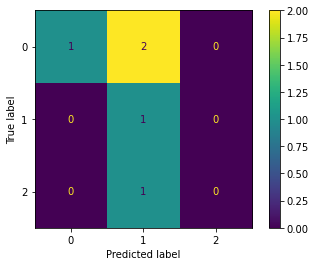

In [50]:
cm=confusion_matrix(y_test,pred_cnb,labels=cnb.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cnb.classes_)
disp.plot()

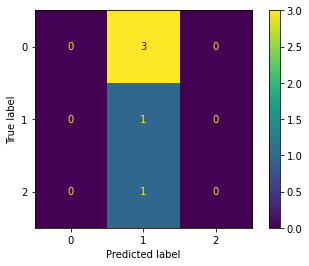

In [51]:
cm2=confusion_matrix(y_test,pred_gnb,labels=gnb.classes_)
disp2=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=gnb.classes_)
disp2.plot()